In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
dir_path='../control_transition'
sys.path.append(dir_path)

In [3]:
from plot_utils import *

In [6]:
L=20
params_list=[
({'nu':0,'de':1,},
{
'p_proj':[0,],
'sC':np.arange(0,500),
'sm':[0],
'L':[L],
# 'maxdim':[2048,4096,],
'maxdim':[2**13,],
'cutoff': [1e-15,1e-10, 1e-5],
'p_ctrl':np.linspace(0,1,21),
}
),
]

In [7]:
# data_MPS_0_T_dict={'fn':set()}
for fixed_params,vary_params in params_list:
    data_MPS_0_T_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        # fn_template='MPS_({nu},{de})_L{L}_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_sC{sC}_sm{sm}_x01_shots_bitstring_T.json',
        fn_template='MPS_({nu},{de})_L{L}_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_sC{sC}_sm{sm}_maxdim{maxdim}_cutoff{cutoff:.1e}.json',
        fn_dir_template='./',
        input_params_template='',
        load_data=load_zip_json,
        filename=None,
        filelist=None,
        load=True,
        data_dict=data_MPS_0_T_dict,
        zip_fn=f'./MPS_0-1_evo_L{L}.zip'
    )
df_MPS_0_T=convert_pd(data_MPS_0_T_dict,names=['Metrics','cutoff','sm','sC','maxdim','p_ctrl','L','p_proj'])

generate_params: 100%|██████████| 31500/31500 [00:01<00:00, 20534.80it/s]


In [8]:
df_MPS_0_T

observations
Metrics cutoff       sm sC  maxdim p_ctrl L  p_proj                      
success 1.000000e-15 0  0   8192   0.00   10 0.0                     True
O       1.000000e-15 0  0   8192   0.00   10 0.0     0.006267527623988444
maxbond 1.000000e-15 0  0   8192   0.00   10 0.0                       32
success 1.000000e-15 0  0   8192   0.05   10 0.0                     True
O       1.000000e-15 0  0   8192   0.05   10 0.0      0.02511636233623001
...                                                                   ...
        1.000000e-05 0  499 8192   0.95   20 0.0       0.9158840100596756
maxbond 1.000000e-05 0  499 8192   0.95   20 0.0                        1
success 1.000000e-05 0  499 8192   1.00   20 0.0                     True
O       1.000000e-05 0  499 8192   1.00   20 0.0                      1.0
maxbond 1.000000e-05 0  499 8192   1.00   20 0.0                        1

[189000 rows x 1 columns]

In [109]:
df_MPS_0_T.xs(1e-1,level='cutoff').index.get_level_values('sC').unique()

Index([15, 31, 34, 53, 69, 88], dtype='int64', name='sC')

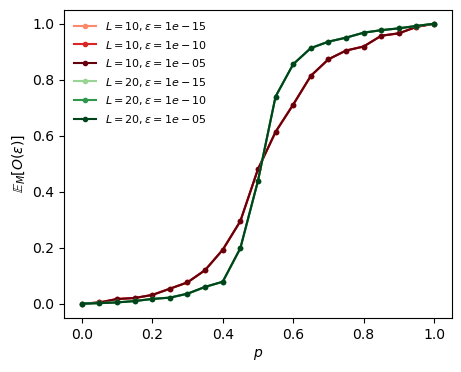

In [9]:
p_list = df_MPS_0_T.index.get_level_values('p_ctrl').unique().sort_values()
fig,ax=plt.subplots(1,1,figsize=(5,4))
maxdim=2**13
cmap_list = [plt.cm.Reds,plt.cm.Greens,plt.cm.Blues]
cutoff_list = [1e-15,1e-10,1e-5]
for idx,L in enumerate([10,20]):
    cmap = iter(cmap_list[idx]( np.linspace(0.4,1,len(cutoff_list)) ))
    for cutoff in cutoff_list:
        O_list=[]
        p_list_=[]
        for p in p_list:
            # try:
            O=np.stack(df_MPS_0_T.xs('O',level='Metrics').xs(p,level='p_ctrl').xs(L,level='L').xs(cutoff,level='cutoff').xs(maxdim,level='maxdim')['observations']).mean()
            p_list_.append(p)
            O_list.append(O)
            # except:
            #     pass
        ax.plot(p_list_,O_list,'.-',label=fr'$L={L},\epsilon={cutoff:.0e}$',color = next(cmap))
# ax.set_yscale('log')
ax.set_xlabel(r'$p$')
ax.set_ylabel(r'$\mathbb{E}_M [O(\epsilon)]$')

# ax.set_ylim(None, 1e5)
ax.legend(fontsize=8,frameon=False)

In [126]:
p=0.1
L=10
cutoff = 1e-5
(df_MPS_0_T.xs('O',level='Metrics').xs(p,level='p_ctrl').xs(L,level='L').xs(cutoff,level='cutoff').xs(maxdim,level='maxdim')['observations']).sort_index(level='sC')

sm  sC   p_proj
0   0    0.0       -0.004558274595816303
    1    0.0        -0.03729218460092394
    2    0.0          0.1260042657463911
    3    0.0       -0.040253425091019764
    4    0.0       -0.010537753896863289
                           ...          
    495  0.0        0.020050608910366502
    496  0.0        0.011938877348414912
    497  0.0        -0.05279317843283828
    498  0.0         0.05727500334097861
    499  0.0        -0.03041658906607565
Name: observations, Length: 500, dtype: object

In [10]:
p=0.1
L=10
cutoff=1e-15
(df_MPS_0_T.xs('O',level='Metrics').xs(p,level='p_ctrl').xs(L,level='L').xs(cutoff,level='cutoff').xs(maxdim,level='maxdim')['observations']).sort_index(level='sC')

sm  sC   p_proj
0   0    0.0       -0.0041198070862553645
    1    0.0         -0.03741550917520097
    2    0.0           0.1261808824893993
    3    0.0         -0.04063009354343034
    4    0.0        -0.010798933949134424
                            ...          
    495  0.0         0.019985760314326344
    496  0.0         0.011740046699106974
    497  0.0         -0.05305816808317391
    498  0.0         0.057240960878366165
    499  0.0        -0.030329875507481126
Name: observations, Length: 500, dtype: object

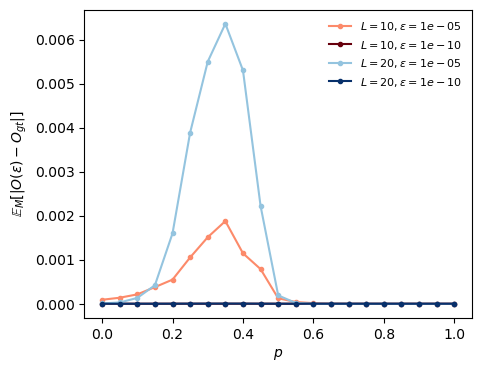

In [11]:
p_list = df_MPS_0_T.index.get_level_values('p_ctrl').unique().sort_values()
fig,ax=plt.subplots(1,1,figsize=(5,4))
maxdim=2**13
cmap_list = [plt.cm.Reds,plt.cm.Blues,plt.cm.Blues]
cutoff_list = [1e-5,1e-10,]
cutoff_min=1e-15
for idx,L in enumerate([10,20]):
    cmap = iter(cmap_list[idx]( np.linspace(0.4,1,len(cutoff_list)) ))
    for cutoff in cutoff_list:
        delta_O_list=[]
        p_list_=[]
        for p in p_list:
            # try:
            O=(df_MPS_0_T.xs('O',level='Metrics').xs(p,level='p_ctrl').xs(L,level='L').xs(cutoff,level='cutoff').xs(maxdim,level='maxdim')['observations'])
            O_gt = (df_MPS_0_T.xs('O',level='Metrics').xs(p,level='p_ctrl').xs(L,level='L').xs(cutoff_min,level='cutoff').xs(maxdim,level='maxdim')['observations'])
            p_list_.append(p)
            delta_O_list.append((np.abs(O-O_gt)).mean())
            # except:
            #     pass
        ax.plot(p_list_,delta_O_list,'.-',label=fr'$L={L},\epsilon={cutoff:.0e}$',color = next(cmap))
# ax.set_yscale('log')
ax.set_xlabel(r'$p$')
ax.set_ylabel(r'$\mathbb{E}_M [|O(\epsilon)-O_{gt}|]$')
# ax.set_ylim(None, 1e5)
ax.legend(fontsize=8,frameon=False)

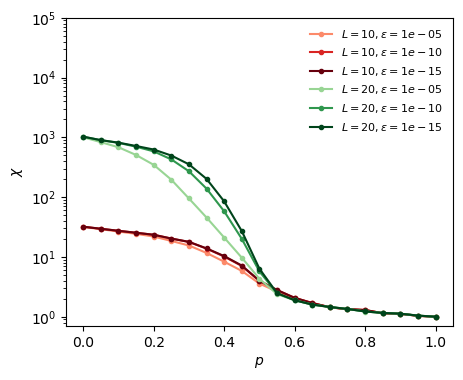

In [12]:
Op_list = df_MPS_0_T.index.get_level_values('p_ctrl').unique().sort_values()
fig,ax=plt.subplots(1,1,figsize=(5,4))
maxdim=2**13
cmap_list = [plt.cm.Reds,plt.cm.Greens,plt.cm.Blues]
cutoff_list = [1e-5,1e-10,1e-15]

for idx,L in enumerate([10,20]):
    cmap = iter(cmap_list[idx]( np.linspace(0.4,1,len(cutoff_list)) ))
    for cutoff in cutoff_list:
        maxbond_list=[]
        p_list_=[]
        for p in p_list:
            # try:
            maxbond=np.stack(df_MPS_0_T.xs('maxbond',level='Metrics').xs(p,level='p_ctrl').xs(L,level='L').xs(cutoff,level='cutoff').xs(maxdim,level='maxdim')['observations']).mean()
            p_list_.append(p)
            maxbond_list.append(maxbond)
            # except:
            #     pass
        ax.plot(p_list_,maxbond_list,'.-',label=fr'$L={L},\epsilon={cutoff:.0e}$',color = next(cmap))
ax.set_yscale('log')
ax.set_xlabel(r'$p$')
ax.set_ylabel(r'$\chi$')
ax.set_ylim(None, 1e5)
ax.legend(fontsize=8,frameon=False)

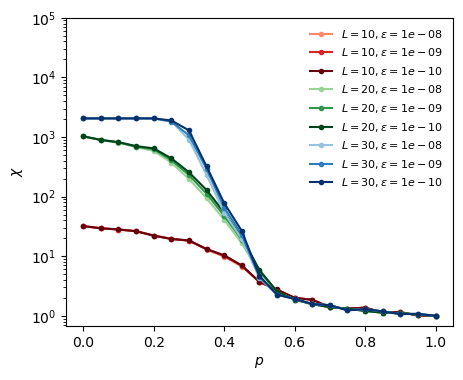

In [ ]:
p_list = df_MPS_0_T.index.get_level_values('p_ctrl').unique().sort_values()
fig,ax=plt.subplots(1,1,figsize=(5,4))
maxdim=2048
cmap_list = [plt.cm.Reds,plt.cm.Greens,plt.cm.Blues]
cutoff_list = [1e-8,1e-9,1e-10]
for idx,L in enumerate([10,20]):
    cmap = iter(cmap_list[idx]( np.linspace(0.4,1,len(cutoff_list)) ))
    for cutoff in cutoff_list:
        maxbond_list=[]
        p_list_=[]
        for p in p_list:
            try:
                maxbond=np.stack(df_MPS_0_T.xs('maxbond',level='Metrics').xs(p,level='p_ctrl').xs(L,level='L').xs(cutoff,level='cutoff').xs(maxdim,level='maxdim')['observations']).mean()
                p_list_.append(p)
                maxbond_list.append(maxbond)
            except:
                pass
        ax.plot(p_list_,maxbond_list,'.-',label=fr'$L={L},\epsilon={cutoff:.0e}$',color = next(cmap))
ax.set_yscale('log')
ax.set_xlabel(r'$p$')
ax.set_ylabel(r'$\chi$')
ax.set_ylim(None, 1e5)
ax.legend(fontsize=8,frameon=False)

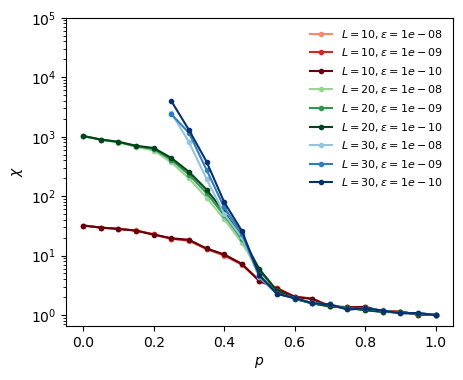

In [33]:
p_list = df_MPS_0_T.index.get_level_values('p_ctrl').unique().sort_values()
fig,ax=plt.subplots(1,1,figsize=(5,4))
maxdim=4096
cmap_list = [plt.cm.Reds,plt.cm.Greens,plt.cm.Blues]
cutoff_list = [1e-8,1e-9,1e-10]
for idx,L in enumerate([10,20,30]):
    cmap = iter(cmap_list[idx]( np.linspace(0.4,1,len(cutoff_list)) ))
    for cutoff in cutoff_list:
        maxbond_list=[]
        p_list_=[]
        for p in p_list:
            try:
                maxbond=np.stack(df_MPS_0_T.xs('maxbond',level='Metrics').xs(p,level='p_ctrl').xs(L,level='L').xs(cutoff,level='cutoff').xs(maxdim,level='maxdim')['observations']).mean()
                p_list_.append(p)
                maxbond_list.append(maxbond)
            except:
                pass
        ax.plot(p_list_,maxbond_list,'.-',label=fr'$L={L},\epsilon={cutoff:.0e}$',color = next(cmap))
ax.set_yscale('log')
ax.set_xlabel(r'$p$')
ax.set_ylabel(r'$\chi$')
ax.set_ylim(None, 1e5)
ax.legend(fontsize=8,frameon=False)

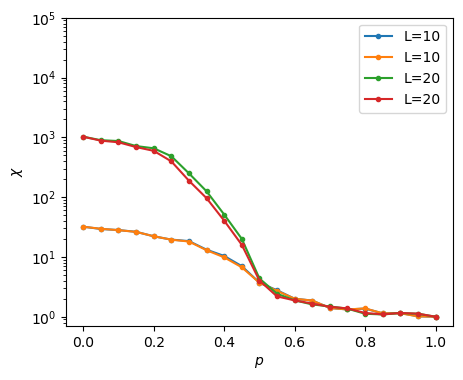

In [29]:
p_list = df_MPS_0_T.index.get_level_values('p_ctrl').unique().sort_values()
fig,ax=plt.subplots(1,1,figsize=(5,4))
for L in [10,20]:
    maxbond_list=[np.stack(df_MPS_0_T.xs('maxbond',level='Metrics').xs(p,level='p_ctrl').xs(L,level='L').xs(1e-10,level='cutoff').xs(2048,level='maxdim')['observations']).mean() for p in p_list]
    ax.plot(p_list,maxbond_list,'.-',label=f'L={L}')

    maxbond_list=[np.stack(df_MPS_0_T.xs('maxbond',level='Metrics').xs(p,level='p_ctrl').xs(L,level='L').xs(1e-8,level='cutoff').xs(2048,level='maxdim')['observations']).mean() for p in p_list]
    ax.plot(p_list,maxbond_list,'.-',label=f'L={L}')
ax.set_yscale('log')
ax.set_xlabel(r'$p$')
ax.set_ylabel(r'$\chi$')
ax.set_ylim(None, 1e5)
ax.legend()

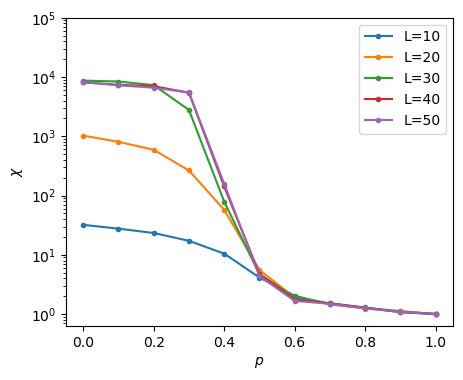

In [17]:
p_list = df_MPS_0_T.index.get_level_values('p_ctrl').unique().sort_values()
fig,ax=plt.subplots(1,1,figsize=(5,4))
for L in [10,20,30,40,50]:
    maxbond_list=[np.stack(df_MPS_0_T.xs('maxbond',level='Metrics').xs(p,level='p_ctrl').xs(L,level='L')['observations']).mean() for p in p_list]
    ax.plot(p_list,maxbond_list,'.-',label=f'L={L}')
ax.set_yscale('log')
ax.set_xlabel(r'$p$')
ax.set_ylabel(r'$\chi$')
ax.set_ylim(None, 1e5)
ax.legend()

In [18]:
print(f"np.complex64: {np.dtype(np.complex64).itemsize} bytes")
print(f"np.complex128 (default np.complex): {np.dtype(np.complex128).itemsize} bytes")
if hasattr(np, 'complex256'):
    print(f"np.complex256: {np.dtype(np.complex256).itemsize} bytes")
else:
    print("np.complex256 not available on this platform")

np.complex64: 8 bytes
np.complex128 (default np.complex): 16 bytes
np.complex256: 32 bytes


In [21]:
np.hstack(df_MPS_0_T.xs('success',level='Metrics')['observations']).sum()

11000

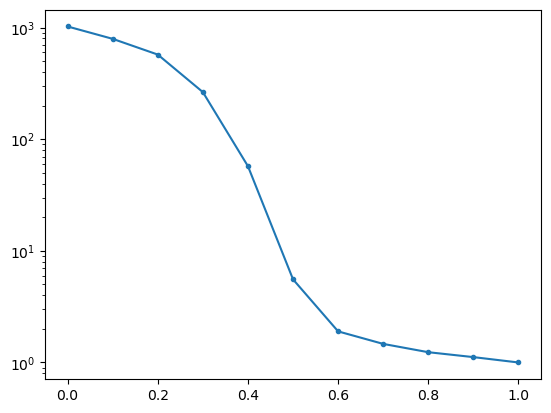

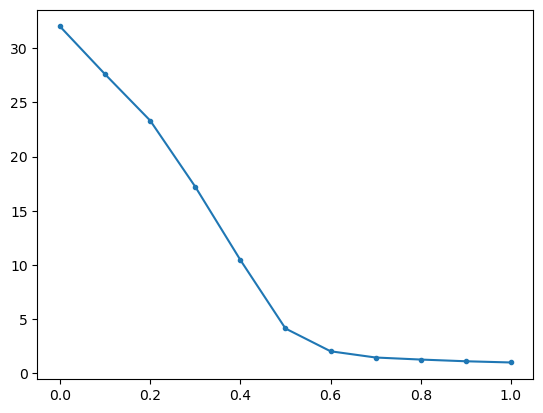

In [ ]:
plt.plot(p_list,maxbond_list,'.-')

In [25]:
p_list

Index([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], dtype='float64', name='p_ctrl')